#Trabajo Práctico de Big Data
Objetivo:
El objetivo de este trabajo práctico es utilizar técnicas de web scraping para obtener comentarios de películas de un sitio web, realizar el procesamiento de texto y analizar el sentimiento de los comentarios utilizando técnicas de análisis de texto. Además, se requiere la visualización de los resultados mediante gráficos para obtener una representación clara de los datos.


Web Scraping:

● Elija un sitio web que contenga comentarios de películas.
● Utilice bibliotecas como BeautifulSoup o Selenium para extraer los comentarios de las películas. Guarde los datos en un archivo CSV o DataFrame.


In [ ]:
!pip install beautifulSoup4
!pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Obtener el contenido HTML de la página
url = 'https://www.imdb.com/title/tt5971474/reviews/?ref_=tt_ql_2'
response = requests.get(url)
html = response.text

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Encontrar los contenedores de los comentarios
containers = soup.find_all('div', {'class': 'lister-item-content'})

# Extraer los comentarios y las calificaciones
comentarios = []
calificaciones = []

for container in containers:
    comentario = container.find('div', {'class': 'text'})
    calificacion = container.find('span', {'class': 'rating-other-user-rating'})

    if comentario is not None and calificacion is not None:
        comentarios.append(comentario.text.strip())
        calificaciones.append(calificacion.text.strip())

# Crear un DataFrame con los datos
data = {'Comentario': comentarios, 'Calificación': calificaciones}
df = pd.DataFrame(data)

# Guardar los datos en un archivo CSV
df.to_csv('comentarios_imdb.csv', index=False)


In [ ]:
df

,Comentario,Calificación
0,You'd think a company like Disney with the amo...,6/10
1,This live action remake was a disappointing at...,6/10
2,I went to see this movie with the attitude tha...,6/10
3,"The Little Mermaid is like a Disney parade, a ...",1/10
4,The Little Mermaid (2023) is a movie that my d...,8/10
5,Let me start off by saying I was impatiently a...,6/10
6,I took my seven year old to see this last nigh...,1/10
7,My Review - The Little Mermaid\nMy Rating- 9/1...,9/10
8,"I'll start with this, Halle Bailey was fantast...",6/10
9,This movie just wasn't good... They added some...,3/10


Procesamiento de Texto:


● Limpie los datos de los comentarios, eliminando caracteres especiales, signos de puntuación y palabras irrelevantes.
● Realice la tokenización y lematización de los comentarios.
● Realice la eliminación de palabras vacías (stop words).


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Obtener el contenido HTML de la página
url = 'https://www.imdb.com/title/tt5971474/reviews/?ref_=tt_ql_2'
response = requests.get(url)
html = response.text

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Encontrar los contenedores de los comentarios
containers = soup.find_all('div', {'class': 'lister-item-content'})

# Inicializar el lematizador y las palabras vacías (stop words)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto
def clean_text(text):
    # Eliminar caracteres especiales y puntuación
    text = re.sub(r'[^\w\s]', '', text)

    # Convertir a minúsculas
    text = text.lower()

    # Tokenización
    tokens = word_tokenize(text)

    # Lematización y eliminación de palabras vacías
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Unir los tokens en un solo texto
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Extraer los comentarios y las calificaciones
comentarios = []
calificaciones = []

for container in containers:
    comentario = container.find('div', {'class': 'text'})
    calificacion = container.find('span', {'class': 'rating-other-user-rating'})

    if comentario is not None and calificacion is not None:
        comentario_text = clean_text(comentario.text.strip())
        comentarios.append(comentario_text)
        calificaciones.append(calificacion.text.strip())

# Crear un DataFrame con los datos
data = {'Comentario': comentarios, 'Calificación': calificaciones}
df = pd.DataFrame(data)

# Guardar los datos en un archivo CSV
df.to_csv('comentarios_imdb.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df

,Comentario,Calificación
0,youd think company like disney amount money re...,6/10
1,live action remake disappointing attempt bring...,6/10
2,went see movie attitude gon na worst disney li...,6/10
3,little mermaid like disney parade bridgerton b...,1/10
4,little mermaid 2023 movie daughter saw theater...,8/10
5,let start saying impatiently awaiting movie ar...,6/10
6,took seven year old see last night fine first ...,1/10
7,review little mermaid rating 910at long last d...,9/10
8,ill start halle bailey fantastic cast perfectl...,6/10
9,movie wasnt good added something like 50 minut...,3/10


Análisis de Sentimiento:


● Utilice una biblioteca de análisis de sentimiento, como NLTK o TextBlob, para asignar un puntaje de sentimiento a cada comentario.
● Clasifique los comentarios en positivos, negativos o neutros según el puntaje de sentimiento.


In [ ]:


# Realizar análisis de sentimiento y clasificar los comentarios
sentimientos = []

for comentario in comentarios:
    blob = TextBlob(comentario)
    sentimiento = blob.sentiment.polarity

    if sentimiento > 0:
        sentimientos.append('Positivo')
    elif sentimiento < 0:
        sentimientos.append('Negativo')
    else:
        sentimientos.append('Neutro')

# Agregar los puntajes de sentimiento al DataFrame
df['Sentimiento'] = sentimientos

# Guardar los datos en un archivo CSV
df.to_csv('comentarios_imdb_sentimiento.csv', index=False)


In [ ]:
df

,Comentario,Calificación,Sentimiento
0,youd think company like disney amount money re...,6/10,Positivo
1,live action remake disappointing attempt bring...,6/10,Negativo
2,went see movie attitude gon na worst disney li...,6/10,Positivo
3,little mermaid like disney parade bridgerton b...,1/10,Negativo
4,little mermaid 2023 movie daughter saw theater...,8/10,Positivo
5,let start saying impatiently awaiting movie ar...,6/10,Positivo
6,took seven year old see last night fine first ...,1/10,Negativo
7,review little mermaid rating 910at long last d...,9/10,Positivo
8,ill start halle bailey fantastic cast perfectl...,6/10,Positivo
9,movie wasnt good added something like 50 minut...,3/10,Positivo


Visualización de Datos:


● Cree gráficos para visualizar los resultados del análisis de sentimiento. Puede utilizar bibliotecas como Matplotlib o Seaborn.
● Genere un gráfico de barras o pastel para mostrar la distribución de los comentarios por categoría de sentimiento (positivo, negativo, neutro).
● Cree un gráfico de líneas para mostrar la evolución del sentimiento a lo largo del tiempo si los comentarios tienen información temporal.


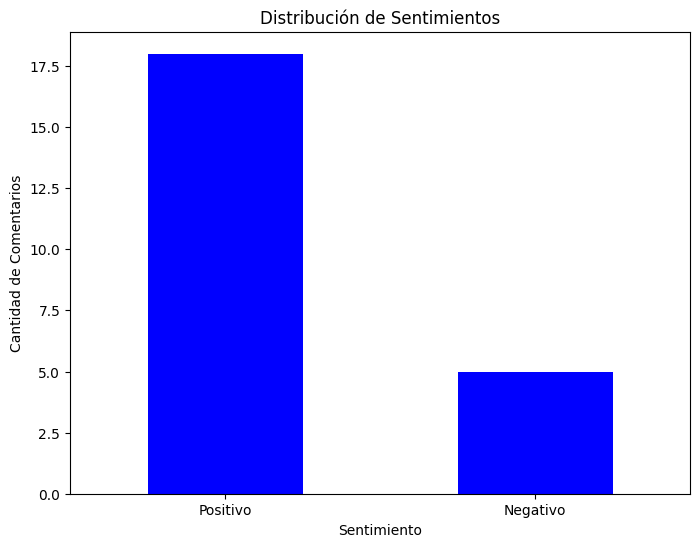

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv('comentarios_imdb_sentimiento.csv')

# Calcular la distribución de los comentarios por categoría de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sentimiento_counts.plot(kind='bar', color='blue')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=0)
plt.show()


Web Scraping:

● Elija un sitio web que contenga comentarios de películas.
● Utilice bibliotecas como BeautifulSoup o Selenium para extraer los comentarios de las películas. Guarde los datos en un archivo CSV o DataFrame.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Obtener el contenido HTML de la página
url = 'https://www.imdb.com/title/tt5164214/reviews/?ref_=tt_ql_2'
response = requests.get(url)
html = response.text

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Encontrar los contenedores de los comentarios
containers = soup.find_all('div', {'class': 'lister-item-content'})

# Extraer los comentarios y las calificaciones
comentarios = []
calificaciones = []

for container in containers:
    comentario = container.find('div', {'class': 'text'})
    calificacion = container.find('span', {'class': 'rating-other-user-rating'})

    if comentario is not None and calificacion is not None:
        comentarios.append(comentario.text.strip())
        calificaciones.append(calificacion.text.strip())

# Crear un DataFrame con los datos
data = {'Comentario': comentarios, 'Calificación': calificaciones}
df = pd.DataFrame(data)

# Guardar los datos en un archivo CSV
df.to_csv('comentarios_imdb.csv', index=False)


In [ ]:
df

,Comentario,Calificación
0,"It's not funny, the characters aren't charming...",3/10
1,"To be fair, I don't exactly think I'm the targ...",2/10
2,Why do people dislike Ocean's 8?I believe this...,1/10
3,"Well, yes. what else was behind this ""idea"". M...",2/10
4,This movie lacked personality. You didn't get ...,6/10
5,"The return of the all female Ghostbusters., th...",1/10
6,Ocean's 8 (3 out of 5 stars).Ocean's 8 is a sp...,6/10
7,"Well, Clinton lost the presidential election b...",4/10
8,"Regardless of the concept, I've always been in...",6/10
9,This is one of those awful films consisting of...,1/10


Procesamiento de Texto:
● Limpie los datos de los comentarios, eliminando caracteres especiales, signos de puntuación y palabras irrelevantes.
● Realice la tokenización y lematización de los comentarios.
● Realice la eliminación de palabras vacías (stop words).


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Obtener el contenido HTML de la página
url = 'https://www.imdb.com/title/tt5164214/reviews/?ref_=tt_ql_2'
response = requests.get(url)
html = response.text

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Encontrar los contenedores de los comentarios
containers = soup.find_all('div', {'class': 'lister-item-content'})

# Inicializar el lematizador y las palabras vacías (stop words)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para limpiar el texto
def clean_text(text):
    # Eliminar caracteres especiales y puntuación
    text = re.sub(r'[^\w\s]', '', text)

    # Convertir a minúsculas
    text = text.lower()

    # Tokenización
    tokens = word_tokenize(text)

    # Lematización y eliminación de palabras vacías
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Unir los tokens en un solo texto
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Extraer los comentarios y las calificaciones
comentarios = []
calificaciones = []

for container in containers:
    comentario = container.find('div', {'class': 'text'})
    calificacion = container.find('span', {'class': 'rating-other-user-rating'})

    if comentario is not None and calificacion is not None:
        comentario_text = clean_text(comentario.text.strip())
        comentarios.append(comentario_text)
        calificaciones.append(calificacion.text.strip())

# Crear un DataFrame con los datos
data = {'Comentario': comentarios, 'Calificación': calificaciones}
df = pd.DataFrame(data)

# Guardar los datos en un archivo CSV
df.to_csv('comentarios_imdb.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,Comentario,Calificación
0,funny character arent charming worst thriller ...,3/10
1,fair dont exactly think im target audience oce...,2/10
2,people dislike ocean 8i believe explained dann...,1/10
3,well yes else behind idea money whats wrong ma...,2/10
4,movie lacked personality didnt get character d...,6/10
5,return female ghostbusters time inept empowerm...,1/10
6,ocean 8 3 5 starsoceans 8 spin reboot ocean tr...,6/10
7,well clinton lost presidential election people...,4/10
8,regardless concept ive always intrigued every ...,6/10
9,one awful film consisting many famous people a...,1/10


Análisis de Sentimiento:
● Utilice una biblioteca de análisis de sentimiento, como NLTK o TextBlob, para asignar un puntaje de sentimiento a cada comentario.
● Clasifique los comentarios en positivos, negativos o neutros según el puntaje de sentimiento.


In [ ]:
# Realizar análisis de sentimiento y clasificar los comentarios
sentimientos = []

for comentario in comentarios:
    blob = TextBlob(comentario)
    sentimiento = blob.sentiment.polarity

    if sentimiento > 0:
        sentimientos.append('Positivo')
    elif sentimiento < 0:
        sentimientos.append('Negativo')
    else:
        sentimientos.append('Neutro')

# Agregar los puntajes de sentimiento al DataFrame
df['Sentimiento'] = sentimientos

# Guardar los datos en un archivo CSV
df.to_csv('comentarios_imdb_sentimiento.csv', index=False)

In [ ]:
df

,Comentario,Calificación,Sentimiento
0,funny character arent charming worst thriller ...,3/10,Positivo
1,fair dont exactly think im target audience oce...,2/10,Positivo
2,people dislike ocean 8i believe explained dann...,1/10,Positivo
3,well yes else behind idea money whats wrong ma...,2/10,Positivo
4,movie lacked personality didnt get character d...,6/10,Positivo
5,return female ghostbusters time inept empowerm...,1/10,Positivo
6,ocean 8 3 5 starsoceans 8 spin reboot ocean tr...,6/10,Positivo
7,well clinton lost presidential election people...,4/10,Positivo
8,regardless concept ive always intrigued every ...,6/10,Positivo
9,one awful film consisting many famous people a...,1/10,Neutro


Visualización de Datos:
● Cree gráficos para visualizar los resultados del análisis de sentimiento. Puede utilizar bibliotecas como Matplotlib o Seaborn.
● Genere un gráfico de barras o pastel para mostrar la distribución de los comentarios por categoría de sentimiento (positivo, negativo, neutro).
● Cree un gráfico de líneas para mostrar la evolución del sentimiento a lo largo del tiempo si los comentarios tienen información temporal.


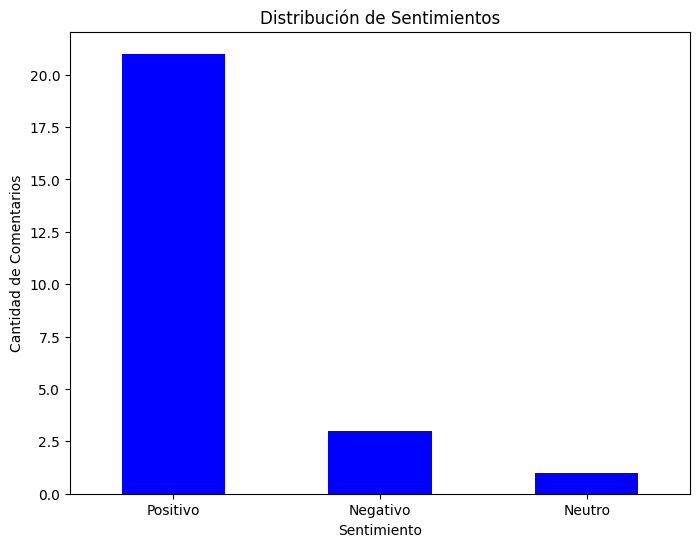

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv('comentarios_imdb_sentimiento.csv')

# Calcular la distribución de los comentarios por categoría de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sentimiento_counts.plot(kind='bar', color='blue')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=0)
plt.show()

Conclusiones:

● Realice conclusiones y análisis sobre los resultados obtenidos.
● ¿Cuál es la tendencia general de sentimiento en los comentarios de las películas?
 ● ¿Existen diferencias en el sentimiento entre géneros de películas  directores específicos?
● Entrega del Trabajo:
● Prepare un informe que incluya los pasos realizados, el código fuente utilizado, los gráficos generados y las conclusiones obtenidas.


La tendencia general de las peliculas en este caso va mucho hacia lo positivo lo que se puede decir es que son peliculas queridas por los usuarios de IMDb. En este caso en particular no existen grandes diferencias entre los dos directores, el director de la sirenita es: Rob Marshall y por otro lado de Oceans Eight es: Gary Ross.


Los pasos a realizar fueron en primer lugar buscar los URLs de comentarios de ambas peliculas, luego prosegui a mirar los colabs de las clases realizadas en conjunto con la prof. Alejandra donde pude encontrar gran ayuda para realizar los codigos, los graficos tambien consegui gracias a observar los graficos de las clases y demas.
Con este trabajo puedo concluir que ambas peliculas tanto la Sirenita 2023 como Oceans 8, son muy queridas por los usuarios de IMDb.
Elegi estas peliculas porque de verdad me gustaron mucho, la Sirenita por ser de Disney y Oceans 8 porque me encanta y fue "realizada" en mi ciudad favorita que es NYC. tambien porque una de las actrices principales es Anne Hathaway. 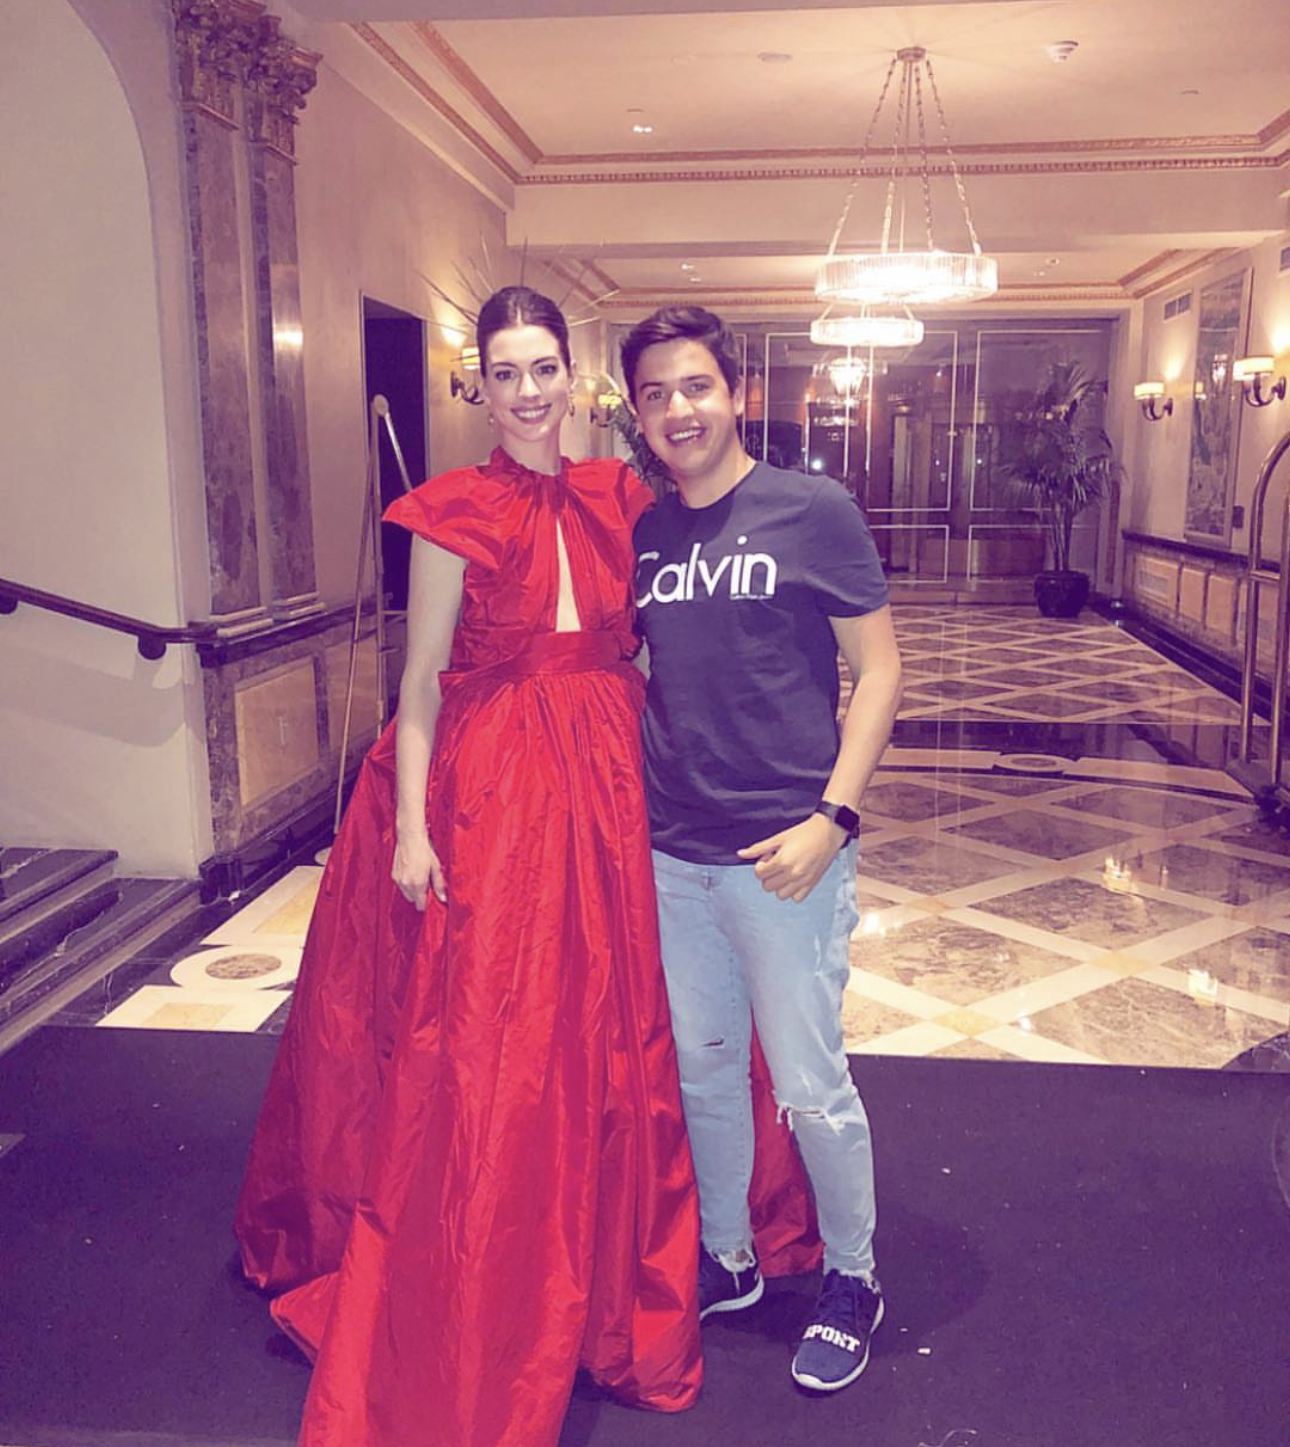